In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os 

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

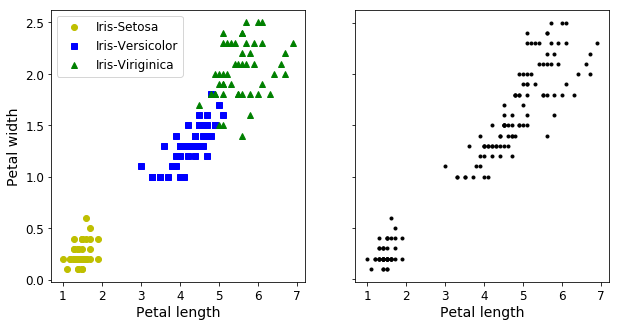

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[ y == 0, 3], "yo",label="Iris-Setosa")
plt.plot(X[y == 1, 2], X[ y == 1, 3], "bs",label="Iris-Versicolor")
plt.plot(X[y == 2, 2], X[ y == 2, 3],"g^",label="Iris-Viriginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize=12)


plt.subplot(122)
plt.scatter(X[:, 2],X[:, 3],c="k",marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

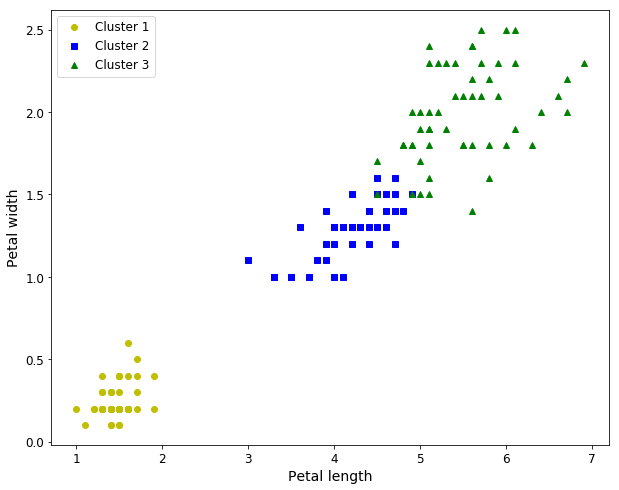

In [6]:
plt.figure(figsize=(10,8))
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo",label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs",label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^",label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [7]:
np.sum(y_pred==y)

145

In [8]:
np.sum(y_pred==y)/len(y_pred)

0.9666666666666667

In [9]:
from sklearn.datasets import make_blobs

In [10]:
blob_centers = np.array(
[[0.2, 2.3],
 [-1.5, 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=7)

In [12]:
def plot_clusters(X,y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.ylabel("$x_2$",fontsize=14,rotation=0)

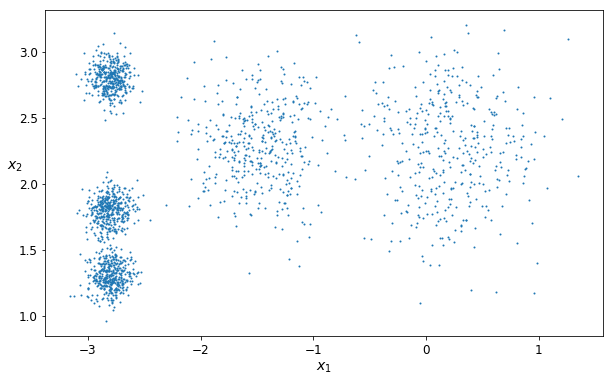

In [13]:
plt.figure(figsize=(10,6))
plot_clusters(X)
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 5 
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [16]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [17]:
y_pred is kmeans.labels_

True

In [18]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [19]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [20]:
X_new = np.array([[0, 2],[3, 2], [-3, 3],[-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [21]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

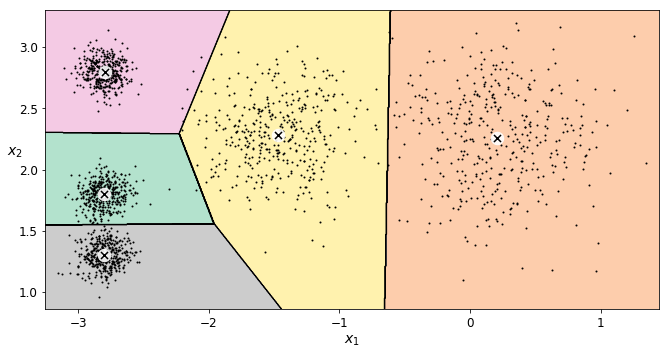

In [22]:
plt.figure(figsize=(11,5.5))
plot_decision_boundaries(kmeans, X)
plt.show()

In [23]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [24]:
np.linalg.norm(np.tile(X_new,(1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_,axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [25]:
kmeans_iter1 = KMeans(n_clusters=5, init="random",n_init=1,algorithm="full",max_iter=1,random_state=1)
kmeans_iter2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random",n_init=1,algorithm="full",max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

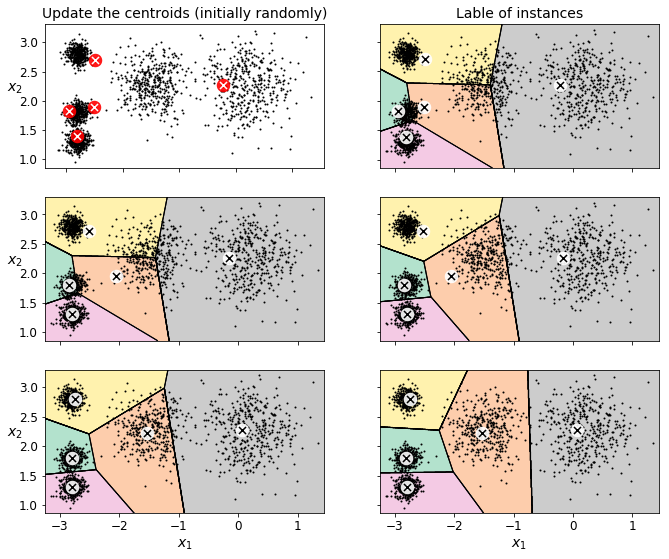

In [28]:
plt.figure(figsize=(11,9))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color="r",cross_color='w')
plt.ylabel("$x_2$",fontsize=14,rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,show_ylabels=False)
plt.title("Lable of instances",fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [32]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
                   
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1,fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer1, X, show_ylabels=False)            
    if title2:
        plt.title(title2,fontsize=14)

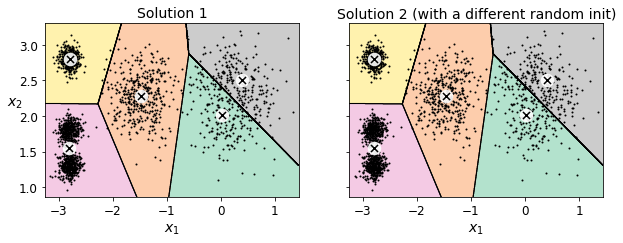

In [35]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1,kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

In [36]:
kmeans.inertia_

211.5985372581684

In [37]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [38]:
kmeans.score(X)

-211.59853725816856

In [39]:
kmeans_rnd_init1.inertia_

223.29108572819035

In [40]:
kmeans_rnd_init2.inertia_

237.46249169442845

In [41]:
kmeans_rnd_10_inits = KMeans(n_clusters=5,init="random",n_init=10,algorithm="full",random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

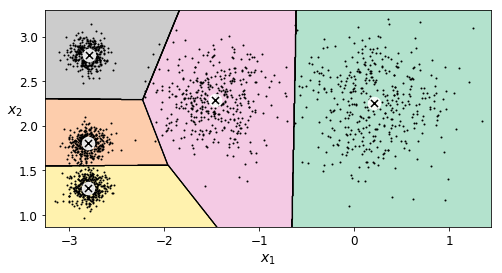

In [42]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [43]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
good_init = np.array([[-3, 3],[-3, 2], [3, 1], [-1, 2],[0, 2]])
kmeans = KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)
kmeans.inertia_

223.2910857281904

In [45]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

157 ms ± 3.59 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [47]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

177 ms ± 9.69 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)
